In [ ]:
import nltk

In [ ]:
nltk.download_shell()

In [11]:
import pandas as pd
messages = pd.read_csv("smsspamcollection/SMSSpamCollection",sep = '\t',names = ['label','message'])
messages.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Data Analysis


In [12]:
messages.describe()
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Let's make a new column to detect how long the text messages are:

In [13]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Import a list of english stopwords from NLTK 


# Data Visualization

Let's visualize this! Let's do the imports:

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

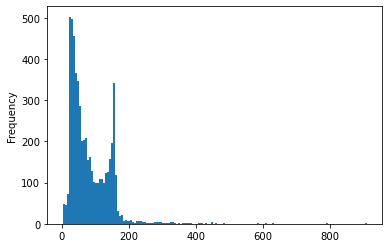

In [15]:
messages['length'].plot(bins=150,kind='hist')

         

In [16]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

** A function to remove punctuation and stopwords from messages

In [17]:
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
messages['message'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [19]:
messages['message'].head(5).apply(text_process)
# Check to make sure its working


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [27]:
message7 = messages['message'][7]
print(message7)
bow7 = bow_transformer.transform([message7])
print(bow7)
print(bow7.shape)


As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
  (0, 909)	1
  (0, 1421)	1
  (0, 1422)	1
  (0, 2814)	2
  (0, 2833)	1
  (0, 3023)	1
  (0, 3098)	1
  (0, 3278)	1
  (0, 4170)	1
  (0, 5292)	1
  (0, 5716)	1
  (0, 6719)	1
  (0, 8796)	1
  (0, 9356)	1
  (0, 9664)	1
(1, 11425)


In [31]:
print(bow_transformer.get_feature_names()[2814])

Melle


Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages.

In [32]:
messages_bow = bow_transformer.transform(messages['message'])

In [33]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


TF-IDF(term frequency-inverse document frequency)

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf7 = tfidf_transformer.transform(bow7)
print(tfidf7)


  (0, 9664)	0.2056563071413685
  (0, 9356)	0.23042542043509162
  (0, 8796)	0.17316925291900245
  (0, 6719)	0.17915298079494393
  (0, 5716)	0.2271572158061633
  (0, 5292)	0.24300264573542718
  (0, 4170)	0.25557987103576274
  (0, 3278)	0.23042542043509162
  (0, 3098)	0.25557987103576274
  (0, 3023)	0.25557987103576274
  (0, 2833)	0.25557987103576274
  (0, 2814)	0.5111597420715255
  (0, 1422)	0.24300264573542718
  (0, 1421)	0.24300264573542718
  (0, 909)	0.19521918926693999


Transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [40]:
tfidf7 = tfidf_transformer.transform(bow7)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


Training a model( Naive Bayes classifier)

In [39]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [41]:
print('predicted:', spam_detect_model.predict(tfidf7)[0])

predicted: ham


## Model Evalution 
Determine the performance of the model


Data Split: split data into two parts test and train data

In [68]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))


4457 1115 5572


## Creating a Data Pipeline

Using pipline SciKit Learn's capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. 

In [45]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [46]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000026115EEAC10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [83]:
predictions = pipeline.predict(msg_test)


In [119]:
# print(msg_test)
pp = pipeline.predict(['Hello, Hi How are you? Are you free tomorrow',
                       'Free Free','Chances to win CASH! From 100 to 20,000'
                      ,'Are you busy??'])

print(pp)


['ham' 'spam' 'spam' 'ham']


In [78]:
print(predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
